# Top 500 Revije Rolling Stone



In [295]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 20
%matplotlib inline

V svoji nalogi bom analizirala top 500 skladb vseh časov po mnenju revije Rolling Stone, ki velja za eno najpomembnejših v svetu glasbene industrije. Za vsako skladbo sem pridobila podatke o mestu na lestvici, izvajalcu, naslovu, avtorju, producentu, založbi in letu izdaje. Prav tako pa tudi najvišje mesto na katerega je bila skladba uvrščena na ameriški glasbeni lestvici Billboard in koliko tednov je bilo skupno na lestvici ter tudi album na katerem je skladba izšla. Vse te podatke sem shranila v tabelo skladbe, ki je tudi prikazana spodaj. Kot vidimo sta tako avtor kot producent podana v obliki seznama, saj jih je večinoma več, zato sem te podatke shranila v dve ločeni tabeli avtorji in producenti. 
Naj še omenim, da so prvotno lestvico izdali leta 2004, leta 2010 pa so naredili nekaj minimalnh popravkov. 

In [296]:
skladbe = pd.read_csv('obdelani-podatki/skladbe.csv')
producenti = pd.read_csv('obdelani-podatki/producenti.csv')
avtorji = pd.read_csv('obdelani-podatki/avtorji.csv')
skladbe2 = skladbe[['izvajalec', 'leto',"zalozba","tedni","mesto"]]

In [297]:
skladbe.tail(5).sort_values("id", ascending = True) 

,id,izvajalec,naslov,avtor,producent,leto,zalozba,tedni,mesto,album
499,1,Bob Dylan,Like a Rolling Stone,['Dylan'],['Tom Wilson '],1965,Columbia,12.0,2.0,Bob Dylan at 70
498,2,The Rolling Stones,(I Can't Get No) Satisfaction,"[' Mick Jagger', 'Keith Richards']",['Andrew Loog Oldham'],1965,London,14.0,1.0,Out of Our Heads
497,3,John Lennon,Imagine,['John Lennon'],"['Lennon', 'Phil Spector', 'Yoko Ono']",1971,Apple,9.0,3.0,Imagine
496,4,Marvin Gaye,What's Going On,"['Gaye', 'Renaldo Benson', 'Al Cleveland']",['Gaye '],1971,Tamla,13.0,2.0,What's Going On
495,5,Aretha Franklin,Respect,['Otis Redding'],['Jerry Wexler'],1967,Atlantic,12.0,1.0,I Never Loved a Man the Way I Love You


## Časovna obdobja

Na začetku nas najprej zanima v katerem obdobju je bilo največ pesmi. To nam prikazuje naslednja tabela. Na prvem mestu je s 35-imi pesmi leto 1965, nato sledita leti 1966 in 1967. Za boljšo predstavo pa si oglejmo še graf števila pesmi v odvisnosti od leta. Opazimo lahko, da je največ pesmi prav v obdobju 60-ih let, čeprav ne gre zanemariti tudi 50-ih in 70-ih let. Medtem, ko lahko od 80-ih let najprej zasledimo večji padec. Slednje ugotovitve je še lažje videti na tortnem diagramu, ki je izrisan spodaj. 

In [298]:
skladbe_po_letih = skladbe.groupby('leto').size()
skladbe_po_letih.sort_values(ascending = False).head(5)

leto
1965    35
1966    28
1967    26
1969    25
1964    23
dtype: int64

Text(0.5, 1.0, 'Število pesmi skozi leta')

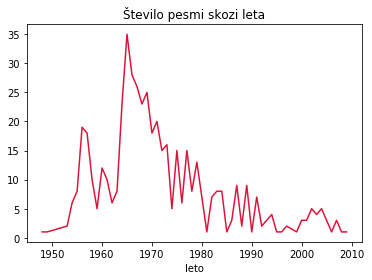

In [299]:
skladbe_po_letih.plot(y = "stevilo skladb", x = "leto",color = ["Crimson"]).set_title('Število pesmi skozi leta')

Za še boljšo predstavo o razporeditvi skladb po desetletjih je spodaj prikazan tortni diagram. Razvidno je, da skoraj 40% vseh pesmi pripada 60-im letom. Tukaj lahko tudi vidimo, da je delež skladb v 70-ih skoraj dvakrat večji kot v 50-ih, čeprav imajo 50-a leta na prejšnjem grafu višji vrh in bi po občutku lahko drugače sklepali. 

[Text(0, 0.5, '')]

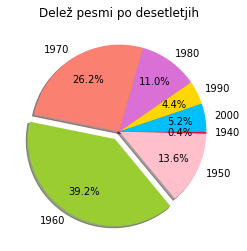

In [361]:
skladbe['desetletje'] = 10 * (skladbe.leto // 10)
colors = ["Crimson","Pink","YellowGreen","Salmon","Orchid","Gold","DeepSkyBlue"]
skladbe[skladbe.leto > 1930].groupby('desetletje').size().plot.pie(explode = (0, 0, 0.1, 0,0,0,0),
                        shadow = True,autopct='%1.1f%%',pctdistance=0.7,
                        counterclock = False,colors = colors, title = 'Delež pesmi po desetletjih').set(ylabel = '')

## Izvajalci

Eno najpomembenjših vprašanj, ki se nam porajajo ob pogledu na lestvico, je zagotovo kateri izvajalci so v tem pregledu popularne glasbe favorizirani. Graf, kjer je prikazanih prvih 10 izvajalcev po številu skladb, nam pove, kar smo po tihem tudi že pričakovali. Na prvem mestu mestu je z veliko prednostjo legendarna angleška skupina The Beatles, na lestvici imajo namreč uvrščenih kar 23 skladb. S po 13 skladbami jim sledi Skupina The Rolling Stones ter Bob Dylan. 

Text(0.5, 1.0, 'Najuspešnejši izvajalci po številu pesmi')

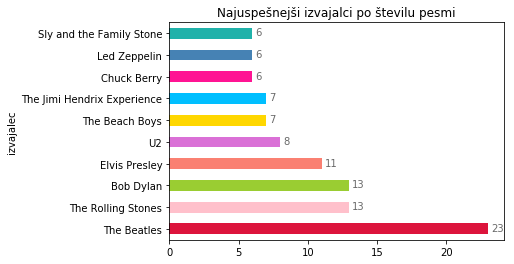

In [433]:
colors2 = colors + ["DeepPink","SteelBlue","LightSeaGreen"]
izvajalci = skladbe.groupby('izvajalec').size().sort_values(ascending = False)[0:10].plot.barh(
    colors = colors2)
for i in izvajalci.patches:
    izvajalci.text(i.get_width()+.2, i.get_y()+.15, \
            i.get_width(), fontsize=10, color='dimgrey')
izvajalci.set_title('Najuspešnejši izvajalci po številu pesmi')

Čeprav smo na prejšnjem grafu opazili, da ima skupina The Beatles uvrščenih daleč največ skladb, pa jih je Bob Dylan prehitel po številu skladb v enem letu, leta 1965 jih ima uvrščenih kar 6. Seveda pa tudi Skupina The Beatles ni daleč zadaj, saj imajo uvrščenih 5 skladb, uspeh pa so ponovili tudi leta 1967, kar je malo več kot deset let poprej uspelo tudi Elvisu Presleyu. 

Text(0.5, 1.0, 'Najuspešnejši izvajalci po številu pesmi v enem letu')

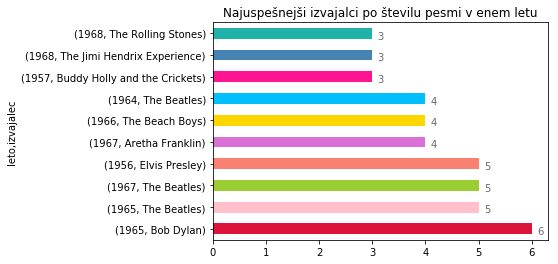

In [418]:
skladbe_leto_izvajalec = skladbe.groupby(['leto',"izvajalec"]).size().sort_values(ascending = False).head(10)
skl = skladbe_leto_izvajalec.plot.barh(colors = colors2)
for i in skl.patches:
    skl.text(i.get_width() + 0.1, i.get_y(), \
            i.get_width(), fontsize=10, color='dimgrey')
skl.set_title('Najuspešnejši izvajalci po številu pesmi v enem letu')

Če se sedaj osredotočimo samo na tri najuspešnejše predstavnike glasbene lestvice. Vidimo, da je imela skupina The Beatles svoje ustvarjanje močno skoncentrirano med leti 1963 in 1970. Tako skupina The Rolling Stones, kot tudi Bob Dylan, pa so se na lestvico uvrščali skozi daljše obdobje, tu predvsem izstopa Dylan, ki ima eno skladbo uvrščeno tudi v tem tisočletju. 

Text(0.5, 1.0, 'Top 3 izvajalci po letih')

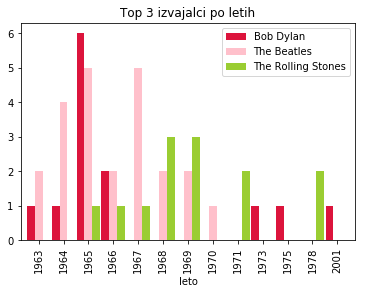

In [309]:
Bob_Dylan = skladbe[skladbe.izvajalec.str.contains("Bob Dylan")].groupby("leto").size()
The_Beatles = skladbe[skladbe.izvajalec.str.contains("The Beatles")].groupby("leto").size()
The_Rolling_Stones = skladbe[skladbe.izvajalec.str.contains("The Rolling Stones")].groupby("leto").size()

zdr = pd.concat([Bob_Dylan, The_Beatles,The_Rolling_Stones], axis=1, sort=False).rename(index=str, 
                            columns={0: "Bob Dylan", 1: "The Beatles", 2:"The Rolling Stones"})
zdr.plot.bar(colors = colors,width = 0.95).set_title('Top 3 izvajalci po letih')

## Avtorji

Če si ogledamo še najbolj popularne avtorje skladb. Pričakovano je na prvem mestu dvojec Lennon - McCartney, vodilna člana skupine The Beatles, ki sta napisala skoraj vse njihove skladbe. Drugo mesto si delita Keith Richards iz skupine The Rolling Stones in Bob Dylan, takoj za njima pa je Mick Jagger, prav tako iz skupine The Rolling Stones. Ugotovimo lahko, da so zadnji trije napisali več skladb, kot pa jih imajo sami uvrščeni na lestvico. Opazimo pa tudi, da na lestvici ni Elvisa Presleya, za katerega pa tudi vemo, da so zanj pisali različni avtorji. 

Text(0.5, 1.0, 'Najuspešnejši avtorji po številu pesmi v enem letu')

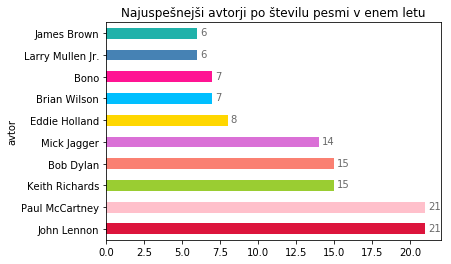

In [419]:
avtorji10 = avtorji.groupby("avtor").size().sort_values(ascending = False).head(10).plot.barh(colors = colors2)
for i in avtorji10.patches:
    avtorji10.text(i.get_width()+.2, i.get_y()+.15, \
            i.get_width(), fontsize=10, color='dimgrey')
avtorji10.set_title('Najuspešnejši avtorji po številu pesmi v enem letu')    

Spodaj je prikazana tabela prvih 5 izvajalcev, ki so tudi avtorji svojih skladb. Tako lahko vidimo, da je Bob Dylan napisal prav vse svoje skladbe, enako velja tudi za ostale. Sicer pa je takšnih glasbenikov 84. Tukaj velja tudi omeniti, da so tudi glasbene skupine izvajale pesmi, ki jih je napisal vsaj eden izmed članov, vendar pa tega iz naših podatkov ni bilo moč razbrati. 

In [435]:
skladbe3 = skladbe[["id",'izvajalec', "naslov",'leto',"zalozba","tedni","mesto"]]
avtorji_skupno = pd.merge(skladbe3, avtorji, left_on = "id", right_on = "skladba")
avtor_in_izvajalec = avtorji_skupno[avtorji_skupno.izvajalec == avtorji_skupno.avtor]
avtor_in_izvajalec.groupby("izvajalec").size().sort_values(ascending = False).head(5)

izvajalec
Bob Dylan        13
Chuck Berry       6
Elton John        5
James Brown       5
Stevie Wonder     4
dtype: int64

## Založbe

Če se osredotočimo še na "business" v glasbeni industriji. Najprej si oglejmo najmogočnejše založbe. Na prvem je ameriška Columbia Records s 43-imi skladbami, sledi ji Capitol Records s 33-imi in Atlantic s še eno manj. 

Text(0.5, 1.0, 'Najuspešnejši založbe po številu pesmi v enem letu')

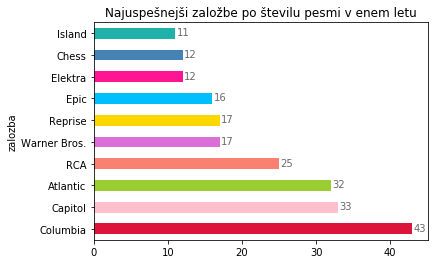

In [436]:
zalozbe = skladbe.groupby('zalozba').size().sort_values(ascending = False)[0:10].plot.barh(colors = colors2)
for i in zalozbe.patches:
    zalozbe.text(i.get_width()+.2, i.get_y()+.15, \
            i.get_width(), fontsize=10, color='dimgrey')
zalozbe.set_title('Najuspešnejši založbe po številu pesmi v enem letu')

V spodnji tabeli je prikazanih pet izvajalcev, ki so sodelovali z največ založbami. Vodi skupina The Beatles, sledijo pa ji Prince, Ray Charles in Buddy Holly. Ugotovimo lahko, da so slednji pogosto menjavali založbe, saj so sodelovali s kar tremi, na lestvici pa imajo uvrščenih manj kot 6 skladb. 

In [438]:
skladbe.groupby(["izvajalec","zalozba"]).size().groupby(level=0).size().sort_values(ascending = False).head(5)

izvajalec
The Beatles                     4
Prince                          3
Ray Charles                     3
Buddy Holly and the Crickets    3
Hank Williams                   2
dtype: int64

V naslednjem grafu lahko vidimo kako se je spreminjalo število založb v posameznem letu. Največ različni založb lahko zasledimo prav v obdobju, ko je uvrščenih tudi največ pesmi, kar je smiselno. 

Text(0.5, 1.0, 'Število različnih založb po letih')

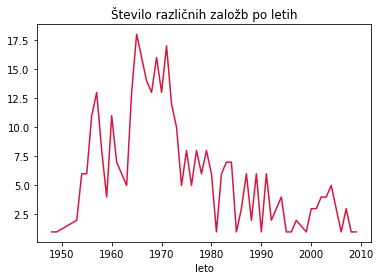

In [440]:
zalozba_leto = skladbe.groupby(["leto","zalozba"]).size().groupby(level=0).size()
zalozba_leto.plot(color = "Crimson").set_title('Število različnih založb po letih')

## Producenti

Kot vidimo iz spodnjega grafa, je daleč najuspešnejši producent George Martin. To mesto je dosegel po zaslugi skupine The Beatles, saj je produciral vse njihove skladbe na lestvici. 

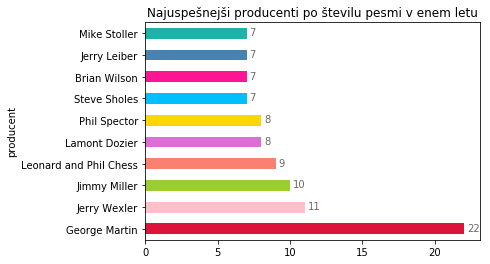

In [448]:
producenti10 = producenti.groupby("producent").size().sort_values(ascending = False).head(10).plot.barh(colors = colors2)
for i in producenti10.patches:
    producenti10.text(i.get_width()+.2, i.get_y()+.15, \
            i.get_width(), fontsize=10, color='dimgrey')
producenti10.set_title('Najuspešnejši producenti po številu pesmi v enem letu')

George_Martin = skladbe[skladbe.producent.str.contains("George Martin")]

V spodnji tabeli so prikazi izvajalci, ki so bili tako avtorji kot producenti. Vidimo lahko, da se tako Bob Dylan, Chuck Berry in Elton John, ki so napisali vse svoje pesmi niso spuščali v produciranje. Medtem, ko pa so se izvajalci kot so James Brown, Prince in Stevie Wonder poglobili tudi v "business" stran ustvarjanja. 

In [447]:
se_producent = pd.merge(avtor_in_izvajalec , producenti,left_on = "id", right_on = "skladba")
se_producent = se_producent[se_producent.izvajalec == se_producent.producent]
se_producent.groupby("izvajalec").size().sort_values(ascending = False).head(5)

izvajalec
James Brown          5
Prince               4
Stevie Wonder        4
Neil Young           3
Bruce Springsteen    3
dtype: int64

## Billboard

Če si sedaj ogledamo še uvrstitve skladb na lestvici Billboard. Na spodnjem grafu je prikazano zaporedno mesto na naši lestvici ter število tednov, ki jih je pesem preživela na Billboard lestvici. Opazimo, da povezave ni, najvišje število tednov imajo celo skladbe pri koncu lestvice. Podobno lahko vidimo tudi na drugem grafu, kjer je prikazno najvišje mesto na lestvici Billboard v odvisnosti od mesta na naši lestvici. Skozi celotno lestvico lahko opazimo bolj kot ne enakomerno porazdelitev, kar pomeni, da nista v korelaciji.

Text(0.5, 1.0, 'Mesto na lestvici revije Rolling Stone in število tednov na lestvici Billboard')

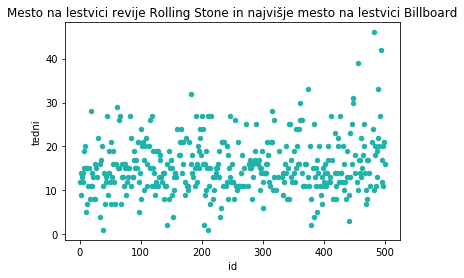

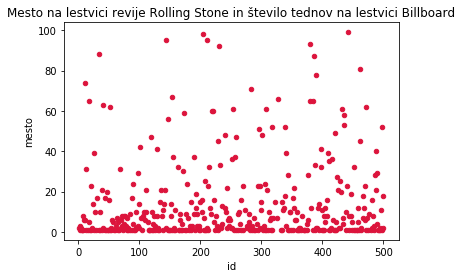

In [313]:
skladbe.plot.scatter("id","tedni", color = "LightSeaGreen").set_title(
    'Mesto na lestvici revije Rolling Stone in najvišje mesto na lestvici Billboard')
skladbe.plot.scatter("id","mesto", color = "crimson").set_title(
    'Mesto na lestvici revije Rolling Stone in število tednov na lestvici Billboard')

V nasprotju s prejšnjima grafoma, pa lahko v naslednjem, kjer je prikazano najvišje mesto na lestvici v odvisnosti od tednov na lestvici Billboard, zasledimo povezavo. Večje število ugodnih mest je tako moč opaziti šele od desetega tedna naprej, medtem, ko so najslabša mesta skoncentrirana na območju, kjer so bile pesmi na lestvici le kakšen teden. To je seveda logično, če pomislimo kako poteka uvrščanje na lestvico. Ko pesem doseže svoj vrhunec, začne navadno polzeti po lestvici, torej če se je uvrstila na višje mesto, bo ta pot trajala dlje časa in pesem bo tako na lestvici ostala še kar nekaj časa.

Text(0.5, 1.0, 'Navišje mesto in število tednov na lestvici Billboard')

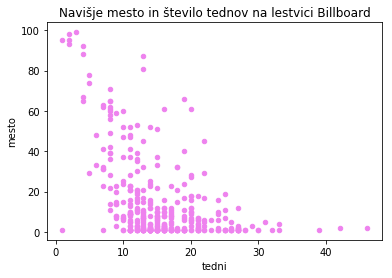

In [314]:
skladbe.plot.scatter("tedni","mesto", color = "Violet").set_title(
    'Navišje mesto in število tednov na lestvici Billboard')

Zdaj si oglejmo še povprečno mesto na lestvici Billboard vsako leto. Ne opazimo nekega posebnega trenda. Najbolj izstopa leto 1995, ko je bila pesem na šele 65. mestu in temu primerno na lestvici prebila le štiri tedne.

In [254]:
billboard_po_letih = skladbe[skladbe.mesto <= 1000].groupby("leto").mean().loc[:, 'tedni':'mesto']
billboard_po_letih.sort_values(by = ["mesto","tedni"],ascending = [False,True]).head(5)

,tedni,mesto
leto,,
1995,4.000000,65.000000
2004,24.600000,45.400000
2000,18.666667,37.666667
1986,12.000000,34.333333
1974,14.666667,25.000000


Text(0.5, 1.0, 'Povprečno mesto in število tednov na lestvici Billboard po letih')

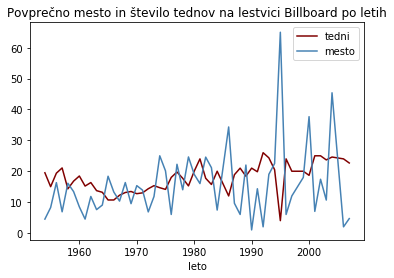

In [315]:
billboard_po_letih.plot(colors = ["Maroon", "SteelBlue"]).set_title(
    'Povprečno mesto in število tednov na lestvici Billboard po letih')

Če si ogledamo še razmerje mest na lestvici. Na prvem grafu si bomo ogledali le skladbe, ki so dosegle vsaj deseto mesto na lestvici. Od teh jih je skoraj polovico zasedlo prvo mesto, sledita pa drugo in tretje. Na drugem pa so vse skladbe, vendar od desetega mesta dalje spadajo v kategorijo others. Tudi tukaj lahko vidimo, da imajo skladbe uvrščene na prvo mesto zelo velik delež.

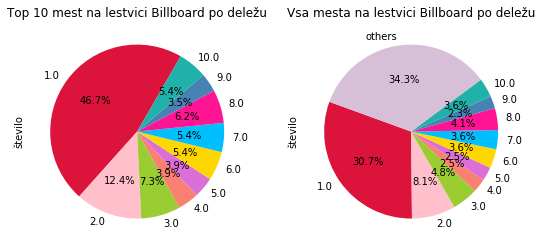

In [380]:
vse = skladbe[skladbe.mesto <= 1000].groupby(['mesto']).size().reset_index(name='število')
top10 = vse[:10].copy()
ostalo = pd.DataFrame(data = {
    'mesto' : ['others'],
    'število' : [vse['število'][10:].sum()]
})
vse2 = pd.concat([top10, ostalo])

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))
top10.plot(kind = 'pie', y = 'število', labels = top10['mesto'], ax = axes[0],autopct='%1.1f%%',
          colors = colors2, startangle = 60).get_legend().remove()
vse2.plot(kind = 'pie', y = 'število', labels = vse2['mesto'], ax = axes[1],autopct='%1.1f%%',
         colors = colors2 + ["Thistle"],startangle = 160).get_legend().remove()
axes[0].set_title('Top 10 mest na lestvici Billboard po deležu')
axes[1].set_title('Vsa mesta na lestvici Billboard po deležu')
plt.show()

V naslednjem grafu si lahko zopet ogledamo 10 najuspešnejši skladb glede na mesto na lestvici Billboard. Tu lahko opazimo precej majhno število tednov v 60-ih letih, kar pa je popolnoma smiselno. V tem obdobju je bilo namreč največ skladb in posledično niso mogle biti vsaka zelo dolgo na lestvici. 

Text(0.5, 1.0, 'Povprečno mesto in število tednov na lestvici Billboard po letih - samo skladbe z uvrstitvijo pod 10')

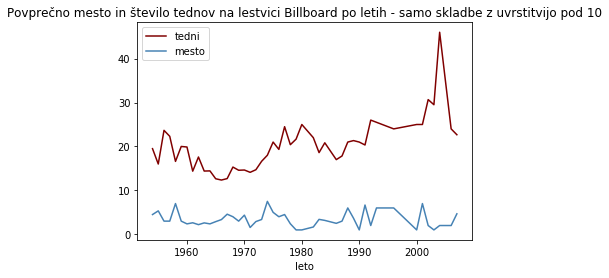

In [318]:
billboard10 = skladbe[skladbe.mesto <= 10].groupby("leto").mean().loc[:, 'tedni':'mesto']
billboard10.plot(colors = ["Maroon", "SteelBlue"]).set_title(
    'Povprečno mesto in število tednov na lestvici Billboard po letih - samo skladbe z uvrstitvijo pod 10')

## Zaključek

Če povzamemo. Iz analize smo opazimo, da se avtorji lestvice niso naslanjali na lestvico Billboard in je po vsej verjetnosti to njihova subjektivna ocena. Ugotovimo lahko, da so veliki ljubitelji glasbe 60-ih letih, saj le ta močno prevladuje med uvrščenimi skladbami. Zato so tudi v večini kategorij v ospredju glavni akterji tega obdobja, kot so skupina The Beatles, Bob Dylan in The Rolling Stones. 
Čeprav so lestvico leta 2010 obnovili, pa na njej z izjemo par skladb skorajda ni glasbe tega tisočletja. Ostane nam vprašanje, na katerega pa niti ne bomo odgovorili: ali je bila glasba 60-ih res tako dobra, da ji glasba tega tisočletja ne sega do kolen ali pa so ustvarjalci te lestvice nekoliko preveč nostalgični. 